#Simple Linear Regression

**Problem statement:**

Is there any association between seed yield per plant and height of that plant

In [ ]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


Data Discription

seed yield per plant in g - seeds weight in gm- Independent Variable

Plant height                                  -                           dependent variable

In [ ]:
df=pd.read_excel('/content/sample_data/crop_height.xlsx',)
df.head()

,Seed yield per plant in g,Plant Height in cm
0,5.22,94.2
1,8.13,69.3
2,6.12,115.3
3,4.16,83.3
4,8.98,85.4


In [ ]:
df.shape


(23, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seed yield per plant in g  23 non-null     float64
 1   Plant Height in cm         23 non-null     float64
dtypes: float64(2)
memory usage: 496.0 bytes


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

array([[ 5.22],
       [ 8.13],
       [ 6.12],
       [ 4.16],
       [ 8.98],
       [ 3.05],
       [ 3.49],
       [ 5.4 ],
       [ 2.39],
       [ 2.71],
       [ 3.97],
       [ 7.56],
       [ 5.17],
       [ 7.22],
       [10.08],
       [ 6.2 ],
       [ 8.39],
       [ 4.08],
       [ 6.9 ],
       [ 6.05],
       [ 2.87],
       [ 7.61],
       [ 7.06]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
# x_train= X_train.reshape(-1, 1)
# y_train= y_train.reshape(-1, 1)
# x_test = X_test.reshape(-1, 1)
X_train

array([[8.39],
       [2.39],
       [3.49],
       [4.08],
       [8.98],
       [6.12],
       [3.05],
       [6.9 ],
       [2.71],
       [5.4 ],
       [6.05],
       [4.16],
       [5.22],
       [6.2 ],
       [5.17]])

##Understanding a regression problem:
Regression belongs to the class of Supervised Learning tasks where the datasets that are used for predictive/statistical modeling contain continuous labels. But, let's define a regression problem more mathematically.

Let's consider the following image below:

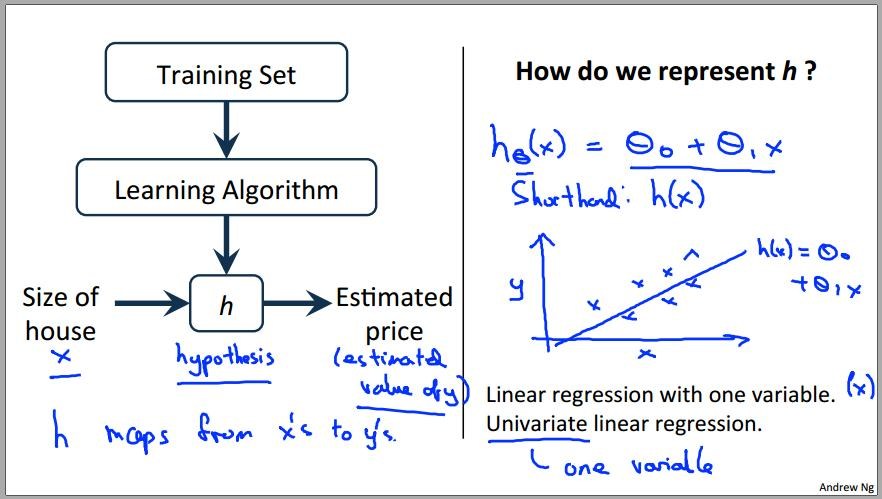

So, in the above image, X is the set of values that correspond to the living areas of various houses (also considered as the space of input values) and y is the price of the respective houses but note that these values are predicted by h. h is the function that maps the X values to y (often called as predictor). For historical reasons, this h is referred to as a hypothesis function

**Linear Regression - how it works?**

To perform regression, you must decide the way you are going to represent h. As an initial choice, let’s say you decide to approximate y as a linear function of x:

hθ(x) = θ0 + θ1x1 + θ2x2

Here, the θi’s are the parameters (also called weights) parameterizing the space of linear functions mapping from X to Y. In a simpler sense, these parameters are used for accurately mapping X to Y

You can reffer below link for better understanding.

[Linear Regression essential](https://www.datacamp.com/community/tutorials/essentials-linear-regression-python)

[Machine learning -regression](https://www.youtube.com/watch?v=8jazNUpO3lQ)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

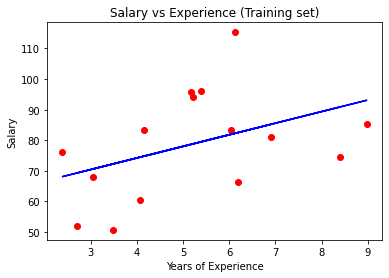

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

###Feature Scaling:
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.

It's also important to apply feature scaling if regularization is used as part of the loss function (so that coefficients are penalized appropriately).

**Methods**

Rescaling (min-max normalization):

Also known as min-max scaling or min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data.

Standardization (Z-score Normalization):





In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train_scaled=scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled=scaler.transform(y_train.reshape(-1,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y1=regressor.predict([[17.23]])
y1

array([124.34070957])

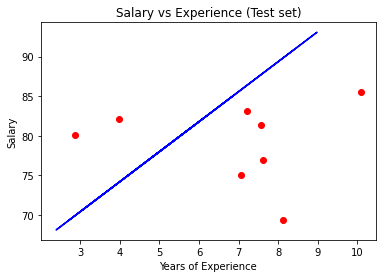

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

###Model performance metrics:
In regression model, the most commonly known evaluation metrics include:

**R-squared (R2)**, which is the proportion of variation in the outcome that is explained by the predictor variables. In multiple regression models, R2 corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The Higher the R-squared, the better the model.

**Root Mean Squared Error (RMSE)**, which measures the average error performed by the model in predicting the outcome for an observation. Mathematically, the RMSE is the square root of the mean squared error (MSE), which is the average squared difference between the observed actual outome values and the values predicted by the model. So, MSE = mean((observeds - predicteds)^2) and RMSE = sqrt(MSE). The lower the RMSE, the better the model.

**Residual Standard Error (RSE)**, also known as the model sigma, is a variant of the RMSE adjusted for the number of predictors in the model. The lower the RSE, the better the model. In practice, the difference between RMSE and RSE is very small, particularly for large multivariate data.

**Mean Absolute Error (MAE)**, like the RMSE, the MAE measures the prediction error. Mathematically, it is the average absolute difference between observed and predicted outcomes, MAE = mean(abs(observeds - predicteds)). MAE is less sensitive to outliers compared to RMSE.

In [ ]:
from sklearn.metrics import  r2_score,mean_squared_error,mean_absolute_error
r2_score(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)

print('The value of R-squared Error is {}:'.format(r2_score(y_test,y_pred)))
print('The value of Mean_Squared Error is {}:'.format(MSE))
print('The value of Mean_Absolute Error is {}:'.format(MAE))

The value of R-squared Error is -4.382798464984934:
The value of Mean_Squared Error is 126.92302355530413:
The value of Mean_Absolute Error is 10.235318783091026:


Can you Interpret what above metrics are showing?

please refer below link and think about it

[sklearn regression metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = df["Seed yield per plant in g"]
y = df["Plant Height in cm"]

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Plant Height in cm   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              171.2
Date:                Mon, 31 May 2021   Prob (F-statistic):                    7.44e-12
Time:                        11:16:16   Log-Likelihood:                         -108.50
No. Observations:                  23   AIC:                                      219.0
Df Residuals:                      22   BIC:                                      220.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Seed yield per plant in g    12.2649      0.937     13.083      0.000      10.321      14.209
==============================================================================
Omnibus:                        4.982   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                1.678
Skew:                          -0.156   Prob(JB):                        0.432
Kurtosis:                       1.714   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""